In [1]:
import os
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read excel file
df = pd.read_excel(os.path.join('..', 'Dataset', '2023_24_data.xlsx'))
df.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,maharashtra,2023-08-10T00:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1010.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
1,maharashtra,2023-08-10T01:00:00,28.0,33.6,26.0,88.92,0.0,0,NaN,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
2,maharashtra,2023-08-10T02:00:00,27.9,32.6,25.2,85.28,0.0,0,rain,0.0,...,1009.0,60.0,2.4,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
3,maharashtra,2023-08-10T03:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
4,maharashtra,2023-08-10T04:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"


Data Preprocessing:
  - Imputed missing values using forward filling and interpolation techniques.
  - Removed outliers using a combination of statistical methods and domain knowledge.
  - Standardized and normalized key variables for consistency.

In [3]:
# Change the datatype of datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9192 entries, 0 to 9191
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              9192 non-null   object        
 1   datetime          9192 non-null   datetime64[ns]
 2   temp              9192 non-null   float64       
 3   feelslike         9192 non-null   float64       
 4   dew               9192 non-null   float64       
 5   humidity          9192 non-null   float64       
 6   precip            9192 non-null   float64       
 7   precipprob        9192 non-null   int64         
 8   preciptype        1936 non-null   object        
 9   snow              8792 non-null   float64       
 10  snowdepth         9034 non-null   float64       
 11  windgust          9192 non-null   float64       
 12  windspeed         9192 non-null   float64       
 13  winddir           9192 non-null   float64       
 14  sealevelpressure  9192 n

In [5]:
# Summary statistics
df.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,8792.0,9034.0,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000
mean,28.647824,32.115785,21.923814,69.485557,0.324500,4.057876,0.0,0.0,21.425653,9.418320,205.497585,1008.794811,41.896628,3.000294,229.352045,0.825457,2.281658,14.913512
std,2.685758,5.105957,4.693387,17.641357,3.568943,19.732299,0.0,0.0,11.008271,5.838098,107.510283,4.160684,37.269286,1.900540,314.986517,1.134428,3.185004,13.685743
min,17.900000,17.900000,0.600000,13.460000,0.000000,0.000000,0.0,0.0,1.100000,0.000000,0.000000,995.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.000000
25%,27.000000,28.500000,19.000000,57.147500,0.000000,0.000000,0.0,0.0,12.600000,5.200000,110.000000,1006.000000,0.000000,2.300000,0.000000,0.000000,0.000000,10.000000
50%,28.700000,32.000000,24.000000,73.555000,0.000000,0.000000,0.0,0.0,19.400000,9.400000,240.000000,1009.000000,33.000000,3.000000,4.000000,0.000000,0.000000,10.000000
75%,30.400000,35.600000,25.400000,83.790000,0.000000,0.000000,0.0,0.0,29.200000,13.525000,290.000000,1012.000000,88.325000,3.200000,473.000000,1.700000,5.000000,10.000000
max,38.000000,48.100000,29.000000,100.000000,203.000000,100.000000,0.0,0.0,63.400000,48.500000,360.000000,1018.700000,100.000000,24.100000,1001.000000,3.600000,10.000000,75.000000


In [6]:
df.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,maharashtra,2023-08-10 00:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1010.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
1,maharashtra,2023-08-10 01:00:00,28.0,33.6,26.0,88.92,0.0,0,NaN,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
2,maharashtra,2023-08-10 02:00:00,27.9,32.6,25.2,85.28,0.0,0,rain,0.0,...,1009.0,60.0,2.4,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
3,maharashtra,2023-08-10 03:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
4,maharashtra,2023-08-10 04:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"


In [7]:
data = df[['datetime', 'temp', 'dew', 'humidity', 'windspeed', 'solarenergy']]
data.head()

,datetime,temp,dew,humidity,windspeed,solarenergy
0,2023-08-10 00:00:00,28.0,26.0,88.92,16.6,0.0
1,2023-08-10 01:00:00,28.0,26.0,88.92,14.8,0.0
2,2023-08-10 02:00:00,27.9,25.2,85.28,6.9,0.0
3,2023-08-10 03:00:00,28.0,26.0,88.92,7.6,0.0
4,2023-08-10 04:00:00,28.0,26.0,88.92,14.8,0.0


In [8]:
file_path = os.path.join('..', 'Dataset', 'data.csv')
data.to_csv(file_path, index=False)
data = pd.read_csv(file_path, parse_dates=['datetime'], index_col='datetime')

In [9]:
# Check if any null value
data.isnull().values.any()

False

In [10]:
# Check if outliers - Calculate Z-scores
data['z_score'] = stats.zscore(data['temp'])

# Identify outliers
outliers = data[data['z_score'].abs() > 3]
display(outliers)

,temp,dew,humidity,windspeed,solarenergy,z_score
datetime,,,,,,
2024-01-05 07:00:00,19.0,18.0,93.93,5.4,0.0,-3.592412
2024-01-06 05:00:00,20.4,17.2,81.64,0.0,0.0,-3.071115
2024-01-16 05:00:00,19.7,11.4,58.64,2.2,0.0,-3.331763
2024-01-16 08:00:00,20.5,12.5,60.38,0.4,0.0,-3.033880
2024-01-17 05:00:00,19.7,14.8,73.37,2.2,0.0,-3.331763
2024-01-18 05:00:00,20.4,15.1,71.30,3.9,0.0,-3.071115
2024-01-19 05:00:00,19.7,14.0,69.57,3.9,0.0,-3.331763
2024-01-19 08:00:00,20.4,16.1,76.39,0.1,0.0,-3.071115
2024-01-20 05:00:00,19.2,17.1,88.20,0.0,0.0,-3.517941


In [11]:
data['z_score'] = stats.zscore(data['dew'])

# Identify outliers
outliers = data[data['z_score'].abs() > 3]
display(outliers)

,temp,dew,humidity,windspeed,solarenergy,z_score
datetime,,,,,,
2024-01-23 00:00:00,25.0,7.0,31.65,9.4,0.0,-3.179927
2024-01-23 01:00:00,24.0,6.0,31.37,5.4,0.0,-3.393004
2024-01-23 03:00:00,25.0,6.0,29.55,11.2,0.0,-3.393004
2024-01-23 04:00:00,25.0,5.0,27.57,5.4,0.0,-3.606081
2024-01-23 05:00:00,19.4,7.6,46.53,3.1,0.0,-3.052080
...,...,...,...,...,...,...
2024-03-20 21:00:00,32.0,7.0,21.07,11.2,0.0,-3.179927
2024-03-20 22:00:00,33.0,4.0,16.18,9.4,0.0,-3.819159
2024-03-21 10:00:00,35.4,7.5,18.07,9.4,1.5,-3.073388


In [12]:
data['z_score'] = stats.zscore(data['humidity'])

# Identify outliers
outliers = data[data['z_score'].abs() > 3]
display(outliers)

,temp,dew,humidity,windspeed,solarenergy,z_score
datetime,,,,,,
2024-02-25 12:00:00,32.0,0.6,13.46,11.4,2.9,-3.175980
2024-02-25 13:00:00,33.0,1.6,13.67,5.2,3.3,-3.164076
2024-03-20 22:00:00,33.0,4.0,16.18,9.4,0.0,-3.021789
2024-04-29 18:00:00,37.0,6.0,14.90,14.8,1.3,-3.094350
2024-04-29 19:00:00,36.0,6.0,15.74,14.8,0.5,-3.046732


In [13]:
data['z_score'] = stats.zscore(data['windspeed'])

# Identify outliers
outliers = data[data['z_score'].abs() > 3]
display(outliers)

,temp,dew,humidity,windspeed,solarenergy,z_score
datetime,,,,,,
2023-09-17 09:00:00,25.0,23.7,92.43,33.1,0.6,4.056624
2023-09-17 19:00:00,28.2,24.5,80.37,27.0,0.2,3.011706
2023-09-18 01:00:00,27.9,24.5,81.79,28.4,0.0,3.251523
2023-09-20 04:00:00,28.0,24.5,81.32,27.4,0.0,3.080225
2023-10-01 19:00:00,29.1,25.2,79.54,32.4,0.1,3.936715
2023-10-02 14:00:00,30.3,26.3,79.20,28.3,3.1,3.234393
2024-04-18 17:00:00,29.6,24.2,72.79,27.7,1.9,3.131615
2024-04-28 15:00:00,36.0,20.2,39.81,31.0,3.2,3.696898
2024-05-13 16:00:00,28.1,20.3,62.62,48.5,2.7,6.694612


In [14]:
data['z_score'] = stats.zscore(data['solarenergy'])

# Identify outliers
outliers = data[data['z_score'].abs() > 3]
display(outliers)

,temp,dew,humidity,windspeed,solarenergy,z_score
datetime,,,,,,


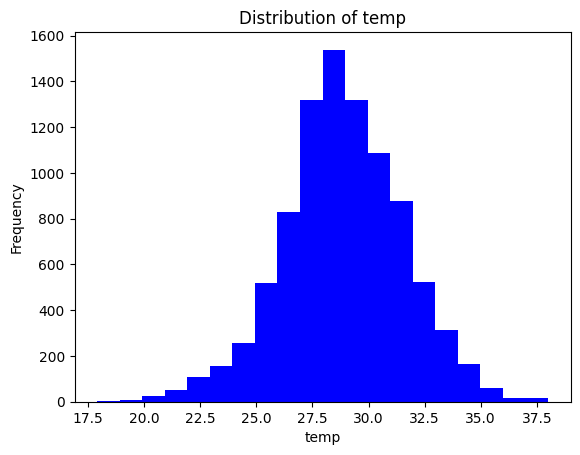

In [15]:
# draw a histogram with blue bars and a grid
data['temp'].hist(bins=20, color='blue', grid=False)

# add labels and title
plt.xlabel('temp')
plt.ylabel('Frequency')
plt.title('Distribution of temp')

# set the x-axis limits to show only ages between 20 and 80
# plt.xlim(0, 100)

plt.show()

<Axes: xlabel='temp'>

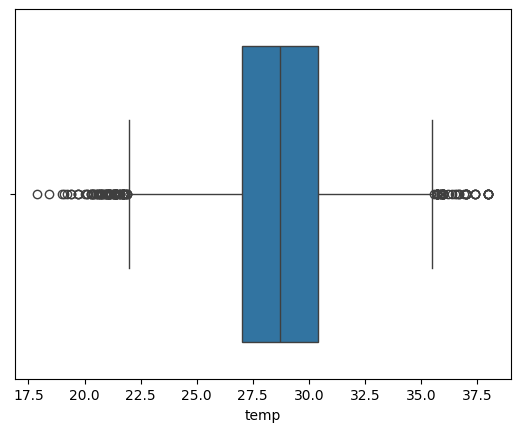

In [16]:
sns.boxplot(x = data['temp'])

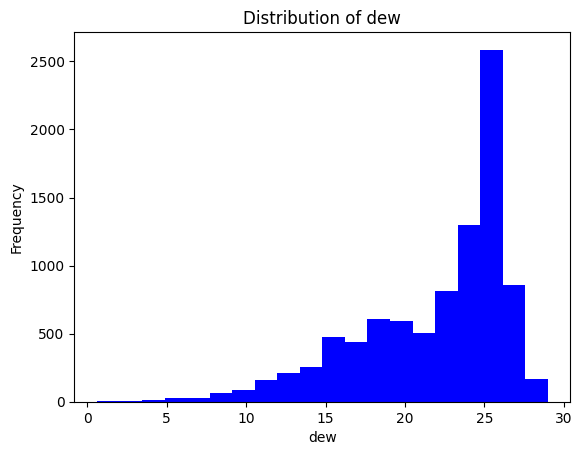

In [17]:
# draw a histogram with blue bars and a grid
data['dew'].hist(bins=20, color='blue', grid=False)

# add labels and title
plt.xlabel('dew')
plt.ylabel('Frequency')
plt.title('Distribution of dew')

# set the x-axis limits to show only ages between 20 and 80
# plt.xlim(0, 100)

plt.show()

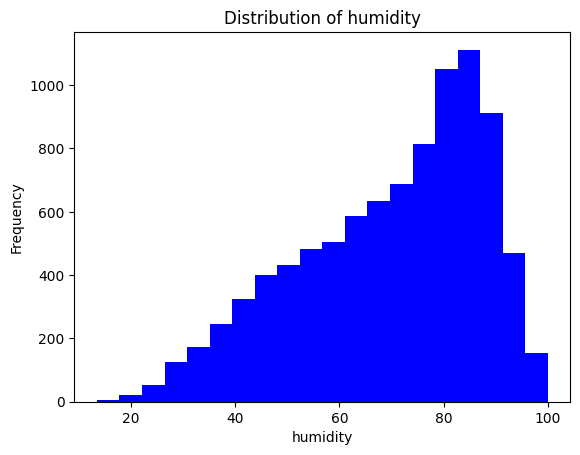

In [18]:
# draw a histogram with blue bars and a grid
data['humidity'].hist(bins=20, color='blue', grid=False)

# add labels and title
plt.xlabel('humidity')
plt.ylabel('Frequency')
plt.title('Distribution of humidity')

# set the x-axis limits to show only ages between 20 and 80
# plt.xlim(0, 100)

plt.show()

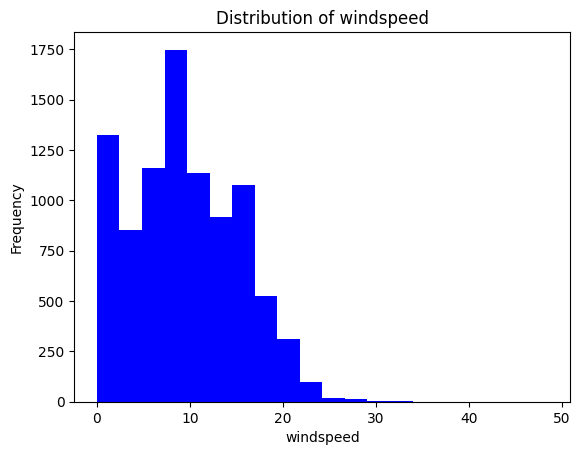

In [19]:
# draw a histogram with blue bars and a grid
data['windspeed'].hist(bins=20, color='blue', grid=False)

# add labels and title
plt.xlabel('windspeed')
plt.ylabel('Frequency')
plt.title('Distribution of windspeed')

# set the x-axis limits to show only ages between 20 and 80
# plt.xlim(0, 100)

plt.show()

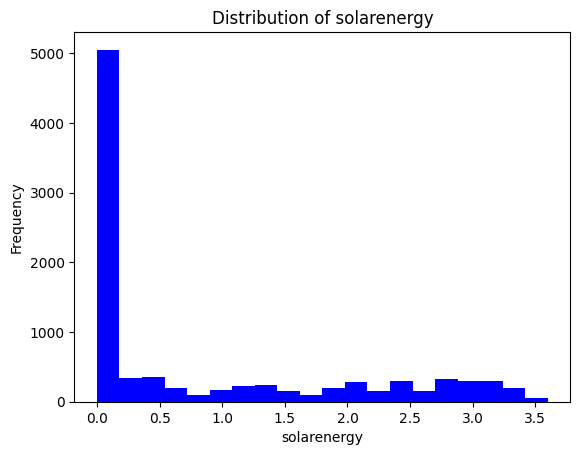

In [20]:
# draw a histogram with blue bars and a grid
data['solarenergy'].hist(bins=20, color='blue', grid=False)

# add labels and title
plt.xlabel('solarenergy')
plt.ylabel('Frequency')
plt.title('Distribution of solarenergy')

# set the x-axis limits to show only ages between 20 and 80
# plt.xlim(0, 100)

plt.show()

# Visualize the Time Series Data

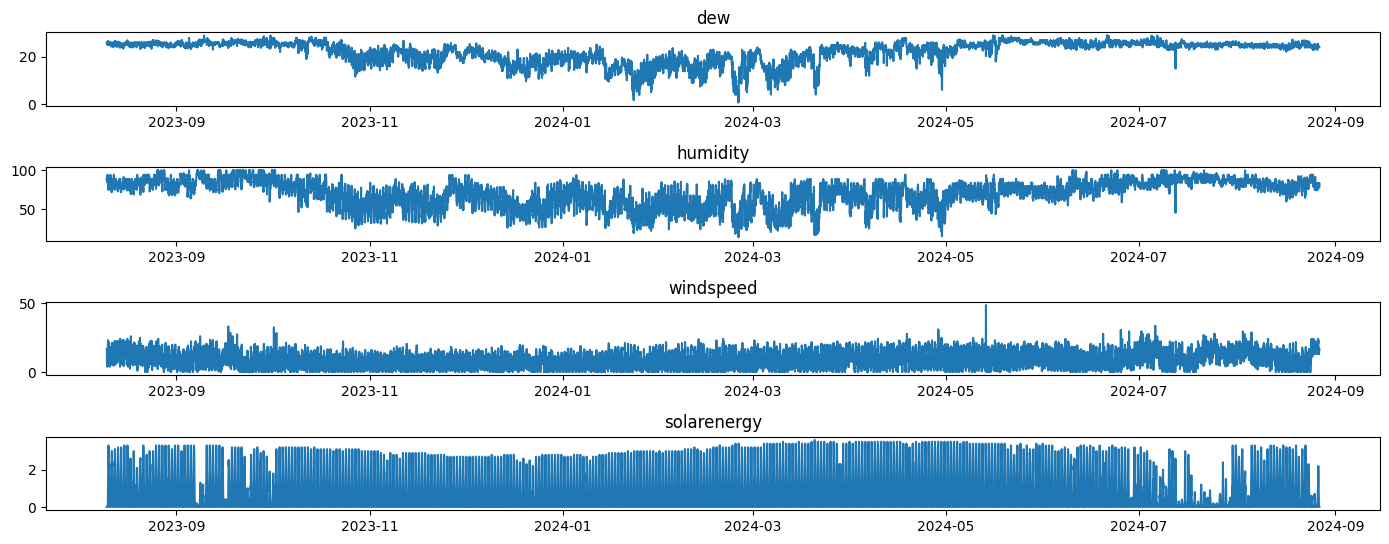

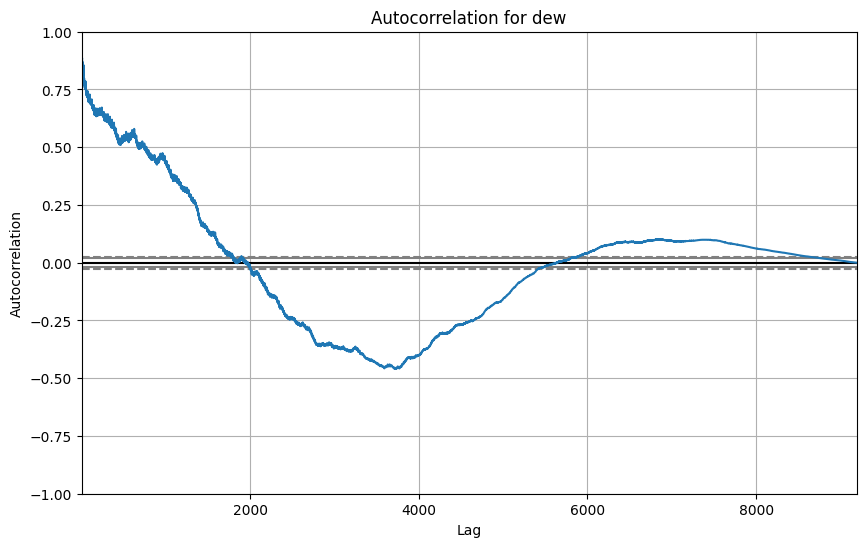

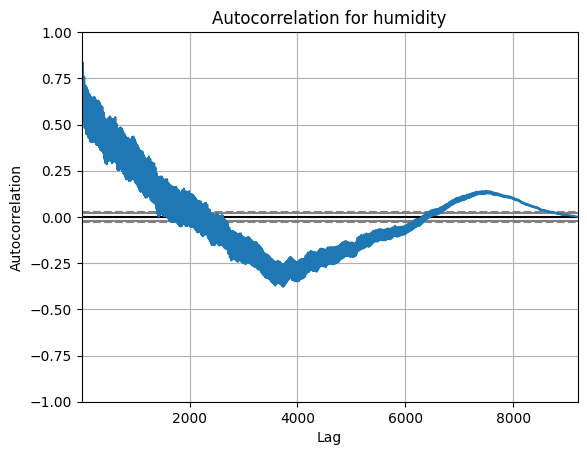

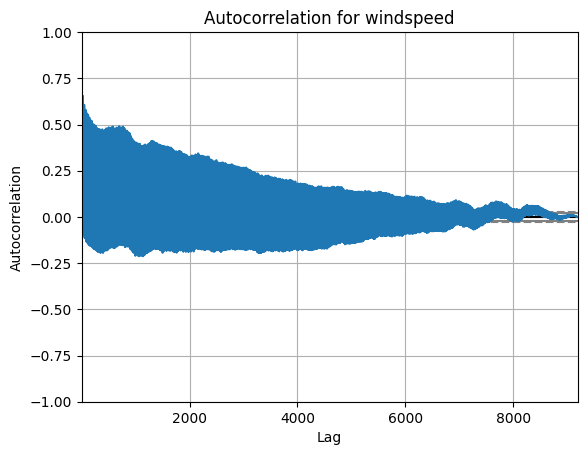

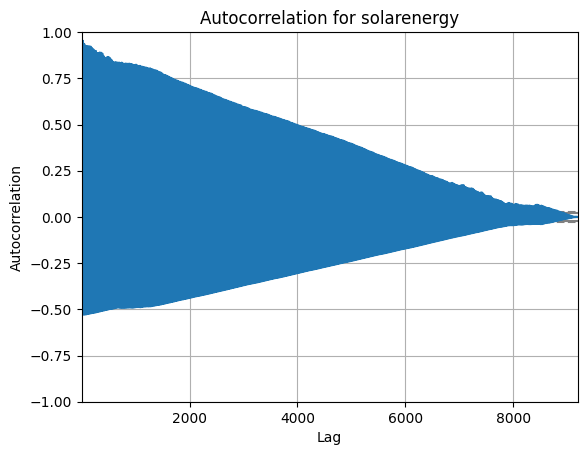

In [21]:
# Plotting each column over time
plt.figure(figsize=(14, 8))
for i, col in enumerate(data.columns[1:-1]):
    plt.subplot(len(data.columns), 1, i+1)
    plt.plot(data.index, df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Check for seasonality using autocorrelation
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
for col in data.columns[1:-1]:
    autocorrelation_plot(data[col])
    plt.title(f'Autocorrelation for {col}')
    plt.show()


# Feature Engineering

In [22]:
data = data.drop('z_score', axis=1)

In [23]:
# Create Time-Based Features

data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['day_of_month'] = data.index.day
data['month'] = data.index.month
data.head()

,temp,dew,humidity,windspeed,solarenergy,hour,day_of_week,day_of_month,month
datetime,,,,,,,,,
2023-08-10 00:00:00,28.0,26.0,88.92,16.6,0.0,0,3,10,8
2023-08-10 01:00:00,28.0,26.0,88.92,14.8,0.0,1,3,10,8
2023-08-10 02:00:00,27.9,25.2,85.28,6.9,0.0,2,3,10,8
2023-08-10 03:00:00,28.0,26.0,88.92,7.6,0.0,3,3,10,8
2023-08-10 04:00:00,28.0,26.0,88.92,14.8,0.0,4,3,10,8


In [24]:
# Lag Features

# Creating lag features to incorporate past data
lags = 24  # Use last 24 hours
for col in data.columns[:-4]:  # Exclude the newly created time-based columns
    for lag in range(1, lags+1):
        df[f'{col}_lag_{lag}'] = data[col].shift(lag)


C:\Users\Kiran\AppData\Local\Temp\ipykernel_17252\4155326435.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = data[col].shift(lag)
C:\Users\Kiran\AppData\Local\Temp\ipykernel_17252\4155326435.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = data[col].shift(lag)
C:\Users\Kiran\AppData\Local\Temp\ipykernel_17252\4155326435.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

In [25]:
# Rolling Mean/Standard Deviation Features

window = 24  # Window of 24 hours

for col in data.columns[:-4]:  # Exclude the time-based columns
    data[f'{col}_rolling_mean'] = data[col].rolling(window=window).mean()
    data[f'{col}_rolling_std'] = data[col].rolling(window=window).std()


In [26]:
data.head()

,temp,dew,humidity,windspeed,solarenergy,hour,day_of_week,day_of_month,month,temp_rolling_mean,temp_rolling_std,dew_rolling_mean,dew_rolling_std,humidity_rolling_mean,humidity_rolling_std,windspeed_rolling_mean,windspeed_rolling_std,solarenergy_rolling_mean,solarenergy_rolling_std
datetime,,,,,,,,,,,,,,,,,,,
2023-08-10 00:00:00,28.0,26.0,88.92,16.6,0.0,0,3,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 01:00:00,28.0,26.0,88.92,14.8,0.0,1,3,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 02:00:00,27.9,25.2,85.28,6.9,0.0,2,3,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 03:00:00,28.0,26.0,88.92,7.6,0.0,3,3,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 04:00:00,28.0,26.0,88.92,14.8,0.0,4,3,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Drop Missing Values (caused by lag/rolling features)
data.dropna(inplace=True)